# Customer Lifestyle and Purchase Trend Segmentation

## Table of Contents <a id='back'></a>
- [Project Introduction](#project-introduction)
    - [Analysis Outline](#analysis-outline)
    - [Results](#results)
- [Importing Libraries and Opening Data Files](#importing-libraries-and-opening-data-files)
- [Data Wrangling](#data-wrangling)
    - [Duplicates](#duplicates)
    - [Missing Values](#missing-values)
    - [Formatting](#formatting)
    - [Removing Irrelevant Data](#removing-irrelevant-data)
- [Exploratory Data Analysis](#exploratory-data-analysis)
- [Conclusions and Reccomendations](#conclusions-and-reccomendations)
- [Dataset Citation](#dataset-citation)

## Project Introduction

[project intro]

### Analysis Outline

[Analysis Outline]

### Results

[Results]


[Back to Table of Contents](#back)

## Importing Libraries and Opening Data Files

In [1]:
# Importing the needed libraries for this assignment
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import math
import folium
from geopy.geocoders import Nominatim
import requests

In [2]:
# Importing file for assignment
try:
    df = pd.read_csv('shopping_behavior_updated.csv', sep=',')
except:
    df = pd.read_csv('/datasets/shopping_behavior_updated.csv', sep=',')

[Back to Table of Contents](#back)

## Data Wrangling

In [3]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


### Duplicates

In [4]:
# Checking for duplicates
df.duplicated().sum()

0

[Back to Table of Contents](#back)

### Missing Values

In [5]:
# Checking for null values
df.isna().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

[Back to Table of Contents](#back)

### Formatting

In [6]:
# Getting general information about the dataset
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [7]:
#checking for snakecase format
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

In [8]:
# Renaming column names to snake_case format
df = df.rename(columns={'Customer ID': 'customer_id',
                        'Age': 'age',
                        'Gender': 'gender',
                        'Item Purchased': 'item_purchased',
                        'Category': 'category',
                        'Purchase Amount (USD)': 'usd_total',
                        'Location': 'location',
                        'Size': 'size',
                        'Color': 'color',
                        'Season': 'season',
                        'Review Rating': 'customer_rating',
                        'Subscription Status': 'sub_status',
                        'Shipping Type': 'shipping_type',
                        'Discount Applied': 'discount_applied',
                        'Promo Code Used': 'promo_code_applied',
                        'Previous Purchases': 'previous_orders',
                        'Payment Method': 'payment_method',
                        'Frequency of Purchases': 'order_freq'})
df.columns

Index(['customer_id', 'age', 'gender', 'item_purchased', 'category',
       'usd_total', 'location', 'size', 'color', 'season', 'customer_rating',
       'sub_status', 'shipping_type', 'discount_applied', 'promo_code_applied',
       'previous_orders', 'payment_method', 'order_freq'],
      dtype='object')

In [9]:
df.head()

,customer_id,age,gender,item_purchased,category,usd_total,location,size,color,season,customer_rating,sub_status,shipping_type,discount_applied,promo_code_applied,previous_orders,payment_method,order_freq
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [10]:
# Converting all elements into snakecase format and removing all nonlegible characters
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = df[column].str.lower()
        df[column] = df[column].str.strip()
        df[column] = df[column].str.rstrip()
        df[column] = df[column].str.replace(' ', '_')
        df[column] = df[column].str.replace('[^a-z0-9_]', '')
        df[column] = df[column].astype('category')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   customer_id         3900 non-null   int64   
 1   age                 3900 non-null   int64   
 2   gender              3900 non-null   category
 3   item_purchased      3900 non-null   category
 4   category            3900 non-null   category
 5   usd_total           3900 non-null   int64   
 6   location            3900 non-null   category
 7   size                3900 non-null   category
 8   color               3900 non-null   category
 9   season              3900 non-null   category
 10  customer_rating     3900 non-null   float64 
 11  sub_status          3900 non-null   category
 12  shipping_type       3900 non-null   category
 13  discount_applied    3900 non-null   category
 14  promo_code_applied  3900 non-null   category
 15  previous_orders     3900 non-null   in

,customer_id,age,gender,item_purchased,category,usd_total,location,size,color,season,customer_rating,sub_status,shipping_type,discount_applied,promo_code_applied,previous_orders,payment_method,order_freq
0,1,55,male,blouse,clothing,53,kentucky,l,gray,winter,3.1,yes,express,yes,yes,14,venmo,fortnightly
1,2,19,male,sweater,clothing,64,maine,l,maroon,winter,3.1,yes,express,yes,yes,2,cash,fortnightly
2,3,50,male,jeans,clothing,73,massachusetts,s,maroon,spring,3.1,yes,free_shipping,yes,yes,23,credit_card,weekly
3,4,21,male,sandals,footwear,90,rhode_island,m,maroon,spring,3.5,yes,next_day_air,yes,yes,49,paypal,weekly
4,5,45,male,blouse,clothing,49,oregon,m,turquoise,spring,2.7,yes,free_shipping,yes,yes,31,paypal,annually


Observation:

- By converting string columns to snake_case and refining table data types, data usage has dropped 62.1%, from over 548.6 KB at the start to 207.8 KB. This optimization process will help reduce data costs and enhance performance as more data is added in the future.

In [11]:
discount = df[['discount_applied', 'promo_code_applied']]

print(discount.sample(10))
print(df['discount_applied'].value_counts())
print(df['promo_code_applied'].value_counts())

     discount_applied promo_code_applied
3433               no                 no
2766               no                 no
2473               no                 no
2001               no                 no
671               yes                yes
1731               no                 no
3060               no                 no
627               yes                yes
729               yes                yes
3649               no                 no
discount_applied
no     2223
yes    1677
Name: count, dtype: int64
promo_code_applied
no     2223
yes    1677
Name: count, dtype: int64


Observation:

- It appears the promo_code_applied column is a redundant duplicate of the discount_applied column, and can be removed to further reduce data usage

In [12]:
df['shipping_type'].unique()

['express', 'free_shipping', 'next_day_air', 'standard', '2-day_shipping', 'store_pickup']
Categories (6, object): ['2-day_shipping', 'express', 'free_shipping', 'next_day_air', 'standard', 'store_pickup']

In [13]:
# Many unique values are very similar and can be consolidated to simplify the analysis
df['shipping_type'] = df['shipping_type'].replace('express', 'paid_shipping').replace('next_day_air', 'paid_shipping').replace('standard', 'paid_shipping').replace('2-day_shipping', 'paid_shipping').replace('store_pickup', 'free_shipping')
df['shipping_type'].unique()

C:\Users\jason\AppData\Local\Temp\ipykernel_22288\1118386650.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['shipping_type'] = df['shipping_type'].replace('express', 'paid_shipping').replace('next_day_air', 'paid_shipping').replace('standard', 'paid_shipping').replace('2-day_shipping', 'paid_shipping').replace('store_pickup', 'free_shipping')


['paid_shipping', 'free_shipping']
Categories (2, object): ['paid_shipping', 'free_shipping']

In [14]:
df['payment_method'].unique()

['venmo', 'cash', 'credit_card', 'paypal', 'bank_transfer', 'debit_card']
Categories (6, object): ['bank_transfer', 'cash', 'credit_card', 'debit_card', 'paypal', 'venmo']

In [15]:
# Many unique values are very similar and can be consolidated to simplify the analysis
df['payment_method'] = df['payment_method'].replace('venmo', 'payment_service').replace('credit_card', 'credit_debit_card').replace('paypal', 'payment_service').replace('bank_transfer', 'cash').replace('debit_card', 'credit_debit_card')
df['payment_method'].unique()

C:\Users\jason\AppData\Local\Temp\ipykernel_22288\3976137506.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['payment_method'] = df['payment_method'].replace('venmo', 'payment_service').replace('credit_card', 'credit_debit_card').replace('paypal', 'payment_service').replace('bank_transfer', 'cash').replace('debit_card', 'credit_debit_card')


['payment_service', 'cash', 'credit_debit_card']
Categories (3, object): ['cash', 'credit_debit_card', 'payment_service']

In [16]:
df['order_freq'].unique()

['fortnightly', 'weekly', 'annually', 'quarterly', 'bi-weekly', 'monthly', 'every_3_months']
Categories (7, object): ['annually', 'bi-weekly', 'every_3_months', 'fortnightly', 'monthly', 'quarterly', 'weekly']

In [51]:
df['order_freq'] = df['order_freq'].replace('fortnightly', 26).replace('weekly', 52).replace('annually', 1).replace('quarterly', 4).replace('bi-weekly', 26).replace('monthly', 12).replace('every_3_months', 4)
df['order_freq'] = df['order_freq'].astype('int')
df = df.rename(columns={'order_freq': 'est_orders_per_year'})
df['est_orders_per_year'].unique()

array([ 14,   7, 365,  91,  30])

[Back to Table of Contents](#back)

### Removing Irrelevant Data

In [18]:
# Removing columns we do not need for this analysis
df = df.drop(columns=['promo_code_applied'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customer_id       3900 non-null   int64   
 1   age               3900 non-null   int64   
 2   gender            3900 non-null   category
 3   item_purchased    3900 non-null   category
 4   category          3900 non-null   category
 5   usd_total         3900 non-null   int64   
 6   location          3900 non-null   category
 7   size              3900 non-null   category
 8   color             3900 non-null   category
 9   season            3900 non-null   category
 10  customer_rating   3900 non-null   float64 
 11  sub_status        3900 non-null   category
 12  shipping_type     3900 non-null   category
 13  discount_applied  3900 non-null   category
 14  previous_orders   3900 non-null   int64   
 15  payment_method    3900 non-null   category
 16  order_freq        3900 n

[Back to Table of Contents](#back)

## Customer Segmentation Analysis

In [19]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customer_id       3900 non-null   int64   
 1   age               3900 non-null   int64   
 2   gender            3900 non-null   category
 3   item_purchased    3900 non-null   category
 4   category          3900 non-null   category
 5   usd_total         3900 non-null   int64   
 6   location          3900 non-null   category
 7   size              3900 non-null   category
 8   color             3900 non-null   category
 9   season            3900 non-null   category
 10  customer_rating   3900 non-null   float64 
 11  sub_status        3900 non-null   category
 12  shipping_type     3900 non-null   category
 13  discount_applied  3900 non-null   category
 14  previous_orders   3900 non-null   int64   
 15  payment_method    3900 non-null   category
 16  order_freq        3900 n

,customer_id,age,gender,item_purchased,category,usd_total,location,size,color,season,customer_rating,sub_status,shipping_type,discount_applied,previous_orders,payment_method,order_freq
0,1,55,male,blouse,clothing,53,kentucky,l,gray,winter,3.1,yes,paid_shipping,yes,14,payment_service,14
1,2,19,male,sweater,clothing,64,maine,l,maroon,winter,3.1,yes,paid_shipping,yes,2,cash,14
2,3,50,male,jeans,clothing,73,massachusetts,s,maroon,spring,3.1,yes,free_shipping,yes,23,credit_debit_card,7
3,4,21,male,sandals,footwear,90,rhode_island,m,maroon,spring,3.5,yes,paid_shipping,yes,49,payment_service,7
4,5,45,male,blouse,clothing,49,oregon,m,turquoise,spring,2.7,yes,free_shipping,yes,31,payment_service,365


### Demographic Segmentation

#### 1. Who are my most valuable customer segments by demographics and spending?

In [20]:
gender_demo = df.groupby('gender').agg({'usd_total': 'sum',
                                        'gender': 'count'})
gender_demo.columns = ['total_sales', 'total_customers']
gender_demo['avg_sales_per_customer'] = (gender_demo['total_sales'] / gender_demo['total_customers']).round(2)
gender_demo = gender_demo.reset_index()
gender_demo

C:\Users\jason\AppData\Local\Temp\ipykernel_22288\1784339576.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_demo = df.groupby('gender').agg({'usd_total': 'sum',


,gender,total_sales,total_customers,avg_sales_per_customer
0,female,75191,1248,60.25
1,male,157890,2652,59.54


In [21]:
loc_demo = df.groupby('location').agg({'usd_total': 'sum', 'gender': 'count', 'customer_rating': 'mean'})
loc_demo.columns = ['total_sales', 'total_customers', 'avg_rating']
loc_demo['avg_sales_per_customer'] = (loc_demo['total_sales'] / loc_demo['total_customers']).round(2)
loc_demo = loc_demo.sort_values(by='total_sales', ascending=False).reset_index().head()
# Changing this column back to a string data type so seaborn can properly interact with the data
loc_demo['location'] = loc_demo['location'].astype('object')

loc_demo

C:\Users\jason\AppData\Local\Temp\ipykernel_22288\3343323054.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  loc_demo = df.groupby('location').agg({'usd_total': 'sum', 'gender': 'count', 'customer_rating': 'mean'})


,location,total_sales,total_customers,avg_rating,avg_sales_per_customer
0,montana,5784,96,3.808333,60.25
1,illinois,5617,92,3.644565,61.05
2,california,5605,95,3.834737,59.00
3,idaho,5587,93,3.781720,60.08
4,nevada,5514,87,3.712644,63.38


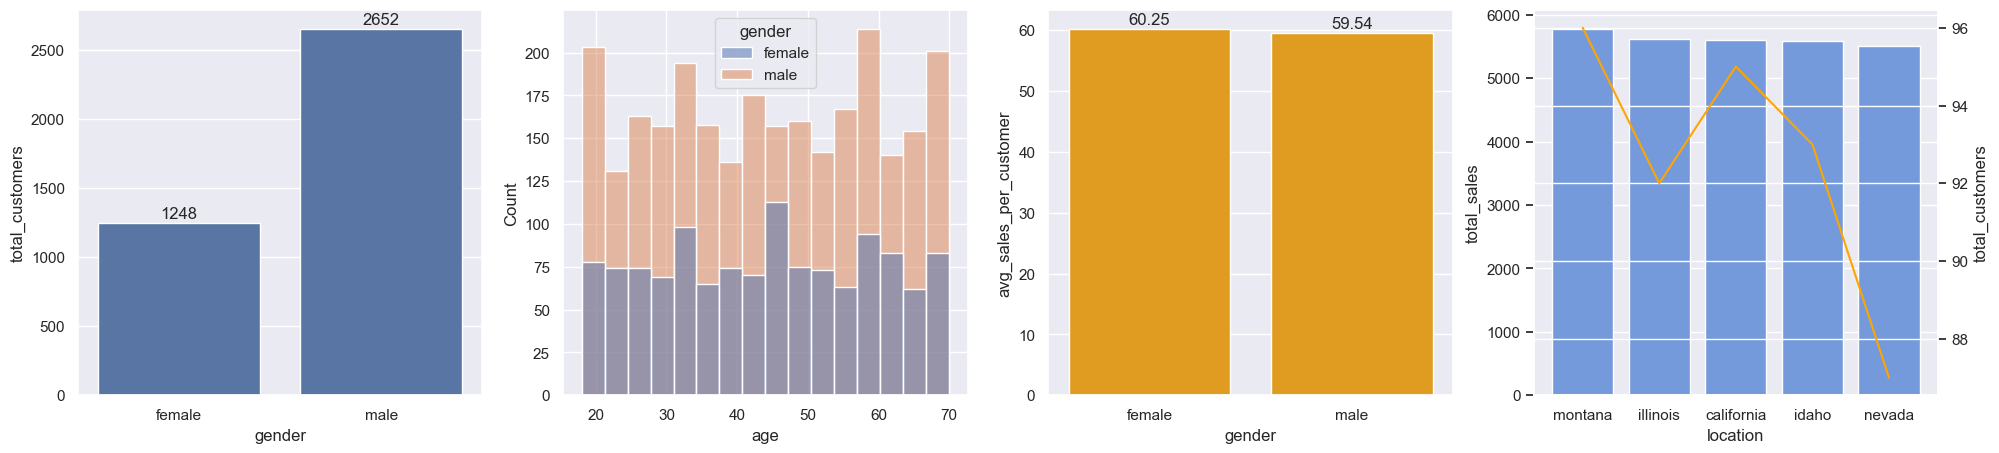

In [22]:
# Setting theme and figure size
sns.set_theme(style='darkgrid')
fig, axes = plt.subplots(1, 4, figsize=(24, 5))

#
total_dem = sns.barplot(data=gender_demo,
                        x='gender',
                        y='total_customers',
                        ax=axes[0])
# Creating loop to display numeric value on graph
for r in total_dem.patches:
    y_value = r.get_height()
    x_value = r.get_x() + r.get_width() / 2
    label = '{:.0f}'.format(y_value)
    total_dem.annotate(label,
                         (x_value, y_value),
                         xytext=(0, 1),
                         textcoords='offset points',
                         ha='center',
                         va='bottom')
    
# 
sns.histplot(data=df,
             x='age',
             hue='gender',
             ax=axes[1])

#
avg_sales = sns.barplot(data=gender_demo,
                        x='gender',
                        y='avg_sales_per_customer',
                        color='orange',
                        ax=axes[2])
# Creating loop to display numeric value on graph
for r in avg_sales.patches:
    y_value = r.get_height()
    x_value = r.get_x() + r.get_width() / 2
    label = '{:.2f}'.format(y_value)
    avg_sales.annotate(label,
                       (x_value, y_value),
                       xytext=(0, 1),
                       textcoords='offset points',
                       ha='center',
                       va='bottom')


# 
top_states = sns.barplot(data=loc_demo,
                        x='location',
                        y='total_sales',
                        color='cornflowerblue',
                        ax=axes[3])

state_customers = sns.lineplot(data=loc_demo,
                            x='location',
                            y='total_customers',
                            color='orange',
                            ax=axes[3].twinx())

plt.show()

Observation:

- 

#### 2. What product preferences differ across customer segments?

In [23]:
# 
m_products = df[df['gender'] == 'male'].groupby('item_purchased').agg({'item_purchased': 'count'})
f_products = df[df['gender'] == 'female'].groupby('item_purchased').agg({'item_purchased': 'count'})

#
m_products.columns = ['quantity_sold']
f_products.columns = ['quantity_sold']

#
top5_mproducts = m_products.reset_index().sort_values(by='quantity_sold', ascending=False).head()
top5_fproducts = f_products.reset_index().sort_values(by='quantity_sold', ascending=False).head()

#
top5_mproducts['item_purchased'] = top5_mproducts['item_purchased'].astype('object')
top5_fproducts['item_purchased'] = top5_fproducts['item_purchased'].astype('object')

C:\Users\jason\AppData\Local\Temp\ipykernel_22288\78282919.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  m_products = df[df['gender'] == 'male'].groupby('item_purchased').agg({'item_purchased': 'count'})
C:\Users\jason\AppData\Local\Temp\ipykernel_22288\78282919.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  f_products = df[df['gender'] == 'female'].groupby('item_purchased').agg({'item_purchased': 'count'})


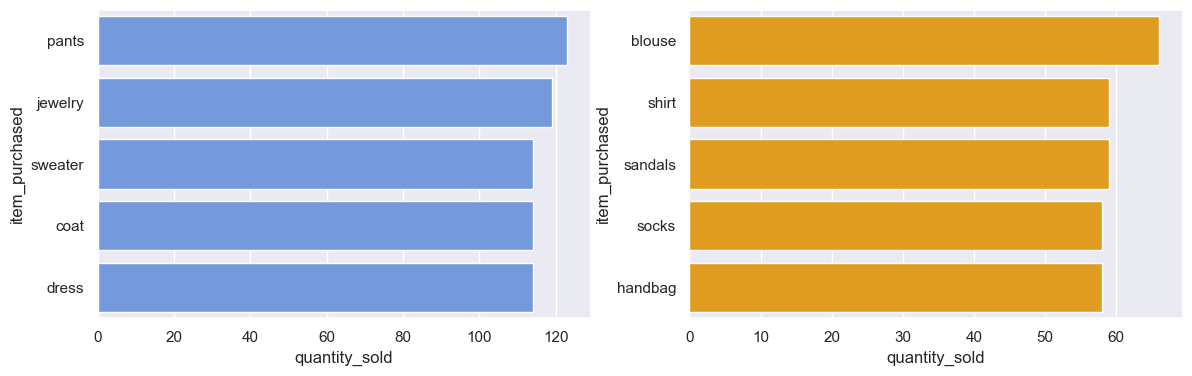

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

# 
top_mproducts = sns.barplot(data=top5_mproducts,
                            x='quantity_sold',
                        y='item_purchased',
                        color='cornflowerblue',
                        ax=axes[0])

top_fproducts = sns.barplot(data=top5_fproducts,
                           x='quantity_sold',
                        y='item_purchased',
                        color='orange',
                        ax=axes[1])

Observation:

- 

#### 3. Which locations have the highest customer ratings? 

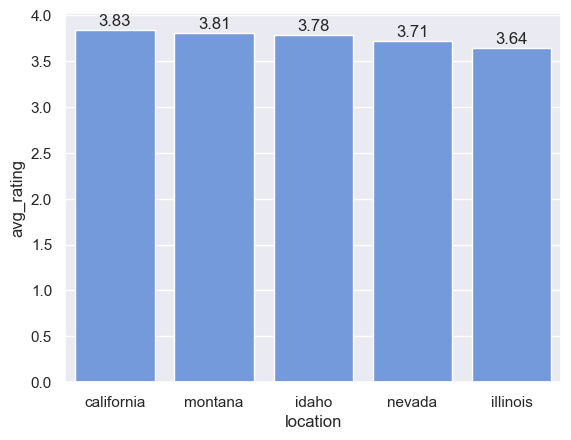

In [25]:
loc_demo = loc_demo.sort_values(by='avg_rating', ascending=False).head()

top_loc_rating = sns.barplot(data=loc_demo,
                             x='location',
                             y='avg_rating',
                             color='cornflowerblue')
for r in top_loc_rating.patches:
    y_value = r.get_height()
    x_value = r.get_x() + r.get_width() / 2
    label = '{:.2f}'.format(y_value)
    top_loc_rating.annotate(label,
                            (x_value, y_value),
                            xytext=(0, 1),
                            textcoords='offset points',
                            ha='center',
                            va='bottom')

Observation:

- 

#### 4. Which age ranges use the most discounts?

In [26]:
df.head()

,customer_id,age,gender,item_purchased,category,usd_total,location,size,color,season,customer_rating,sub_status,shipping_type,discount_applied,previous_orders,payment_method,order_freq
0,1,55,male,blouse,clothing,53,kentucky,l,gray,winter,3.1,yes,paid_shipping,yes,14,payment_service,14
1,2,19,male,sweater,clothing,64,maine,l,maroon,winter,3.1,yes,paid_shipping,yes,2,cash,14
2,3,50,male,jeans,clothing,73,massachusetts,s,maroon,spring,3.1,yes,free_shipping,yes,23,credit_debit_card,7
3,4,21,male,sandals,footwear,90,rhode_island,m,maroon,spring,3.5,yes,paid_shipping,yes,49,payment_service,7
4,5,45,male,blouse,clothing,49,oregon,m,turquoise,spring,2.7,yes,free_shipping,yes,31,payment_service,365


In [27]:
disc_by_age = df[df['discount_applied'] == 'yes'].groupby('age').agg({'discount_applied': 'count'})
disc_by_age.columns = ['total_discounts']
disc_by_age = disc_by_age.reset_index()

In [36]:
bins = [18, 24, 34, 44, 54, 64, 70]   # right endpoint inclusive by default behavior depends on pd.cut right=True
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65-70']

disc_by_age['age_group'] = pd.cut(disc_by_age['age'], bins=bins, labels=labels, right=True, include_lowest=True)

# check counts (important)
print(disc_by_age['age_group'].value_counts().sort_index())

age_group
18-24     7
25-34    10
35-44    10
45-54    10
55-64    10
65-70     6
Name: count, dtype: int64


(25.0, 35.0)

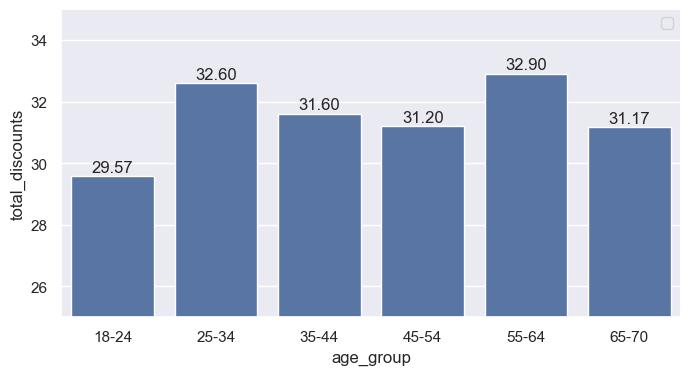

In [47]:
fig, ax = plt.subplots(figsize=(8, 4))

avg_disc_by_age = sns.barplot(data=disc_by_age,
            x='age_group',
            y='total_discounts',
            label=labels,
            errorbar=None)

for r in avg_disc_by_age.patches:
    y_value = r.get_height()
    x_value = r.get_x() + r.get_width() / 2
    label = '{:.2f}'.format(y_value)
    avg_disc_by_age.annotate(label,
                            (x_value, y_value),
                            xytext=(0, 1),
                            textcoords='offset points',
                            ha='center',
                            va='bottom')
plt.legend('')
plt.ylim([25, 35])

Observation:

- 

#### 5. Which gender and location shows the highest purchase frequency?

In [48]:
df.head()

,customer_id,age,gender,item_purchased,category,usd_total,location,size,color,season,customer_rating,sub_status,shipping_type,discount_applied,previous_orders,payment_method,order_freq
0,1,55,male,blouse,clothing,53,kentucky,l,gray,winter,3.1,yes,paid_shipping,yes,14,payment_service,14
1,2,19,male,sweater,clothing,64,maine,l,maroon,winter,3.1,yes,paid_shipping,yes,2,cash,14
2,3,50,male,jeans,clothing,73,massachusetts,s,maroon,spring,3.1,yes,free_shipping,yes,23,credit_debit_card,7
3,4,21,male,sandals,footwear,90,rhode_island,m,maroon,spring,3.5,yes,paid_shipping,yes,49,payment_service,7
4,5,45,male,blouse,clothing,49,oregon,m,turquoise,spring,2.7,yes,free_shipping,yes,31,payment_service,365


In [ ]:
df['est_orders_per_year'].value_counts()

order_freq
91     1147
14     1089
365     572
30      553
7       539
Name: count, dtype: int64

In [ ]:
df.groupby(['location', 'gender']).agg({'est_orders_per_year': 'value_counts'})

C:\Users\jason\AppData\Local\Temp\ipykernel_22288\827642088.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['location', 'gender']).agg({'order_freq': 'value_counts'})


order_freq
location gender order_freq            
alabama  female 91                  10
                14                   9
                7                    6
                30                   1
                365                  1
...                                ...
wyoming  male   14                  13
                91                  12
                7                   11
                365                 11
                30                   4

[500 rows x 1 columns]

Observation:

- 

### Behavioral Segmentation

#### 6. How does subscription status and shipping type affect customer behavior?

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

sub_rev = sns.barplot(data=df,
                      x='sub_status',
                      y='usd_total',
                      estimator=np.mean,
                      errorbar=None,
                      ax=axes[0])
for r in sub_rev.patches:
    y_value = r.get_height()
    x_value = r.get_x() + r.get_width() / 2
    space = 1
    label = '{:.1f}'.format(y_value)
    sub_rev.annotate(label,
                     (x_value, y_value),
                     xytext=(0, space),
                     textcoords='offset points',
                     ha='center',
                     va='bottom')

sub_orders = sns.barplot(data=df,
                      x='sub_status',
                      y='previous_orders',
                      estimator=np.mean,
                      errorbar=None,
                      ax=axes[1])
# Creating loop to display numeric value on graph
for r in sub_orders.patches:
    y_value = r.get_height()
    x_value = r.get_x() + r.get_width() / 2
    space = 1
    label = '{:.1f}'.format(y_value)
    sub_orders.annotate(label,
                        (x_value, y_value),
                        xytext=(0, space),
                        textcoords='offset points',
                        ha='center',
                        va='bottom')


sub_rating = sns.barplot(data=df,
                      x='sub_status',
                      y='customer_rating',
                      estimator=np.mean,
                      errorbar=None,
                      ax=axes[2])
# Creating loop to display numeric value on graph
for r in sub_rating.patches:
    y_value = r.get_height()
    x_value = r.get_x() + r.get_width() / 2
    space = 1
    label = '{:.1f}'.format(y_value)
    sub_rating.annotate(label,
                        (x_value, y_value),
                        xytext=(0, space),
                        textcoords='offset points',
                        ha='center',
                        va='bottom')


Observation:

- 

### 4. Which segments respond best to discounts?

In [ ]:
discounts = df.groupby(['gender', 'discount_applied']).agg({'item_purchased': 'count',
                                                            'usd_total': 'mean'})
discounts = discounts.sort_values(by='usd_total', ascending=False).reset_index()
discounts

Observation:

- 

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 4))

sns.barplot(data=df,
            x='discount_applied',
            y='usd_total',
            estimator=np.mean,
            errorbar=None,
            ax=axes[0])

sns.barplot(data=df,
            x='discount_applied',
            y='previous_orders',
            estimator=np.mean,
            errorbar=None,
            ax=axes[1])

Observation:

- 

### 5. What payment and location patterns exist among customer segments?

In [ ]:
df.head()

In [ ]:
df.columns

In [ ]:
pd.set_option('display.max_rows', None)

In [ ]:
df.groupby('gender').agg({'payment_method': 'value_counts'})

In [ ]:
df.groupby(['location', 'gender']).agg({'payment_method': 'value_counts'})

Observation:

- 

[Back to Table of Contents](#back)

## Conclusions and Reccomendations

[Back to Table of Contents](#back)

## Dataset Citation

Zee solver. (2023, October). Consumer Behavior and Shopping Habits Dataset, Version 1. Retrieved September 23, 2025 from [Kaggle](https://www.kaggle.com/datasets/zeesolver/consumer-behavior-and-shopping-habits-dataset/data).

[Back to Table of Contents](#back)